# Genetic Algorithm Tutorial 
CMPE 373 Agent Based Modeling Course
- Dr. [Uzay Çetin](https://uzay00.github.io)


## Genetic Algorithms
![](GA.pdf)

U. Cetin and Y. E. Gundogmus, "Feature Selection with Evolving, Fast and Slow Using Two Parallel Genetic Algorithms," 2019 4th International Conference on Computer Science and Engineering (UBMK), Samsun, Turkey, 2019, pp. 699-703.

In [2]:
from IPython.display import HTML

addr = '<iframe width="560" height="315" src="https://www.youtube.com/embed/VxA2vR6w07E" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'
# Youtube
HTML(addr)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
eyes = [2.25,3.75,5,5,4] 
nose = [3,3,6]
mouth = [2.5,3,3.5, 1.15,1,1.15,8]
target_gene = np.array(eyes + nose + mouth)

In [5]:
target_gene

array([2.25, 3.75, 5.  , 5.  , 4.  , 3.  , 3.  , 6.  , 2.5 , 3.  , 3.5 ,
       1.15, 1.  , 1.15, 8.  ])

In [6]:
def draw_face(target):
    plt.plot([target[0],target[1]], [target[2],target[3]], 'go', markersize=target[4]*10)
    plt.plot(target[5], target[6], 'r^', markersize=target[7]*10)
    plt.plot([target[8],target[9],target[10]], [target[11],target[12],target[13]], 'b', linewidth=target[14])
    plt.tight_layout()

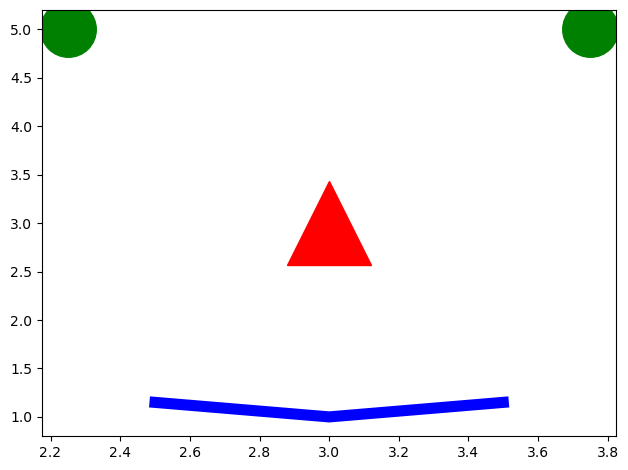

In [7]:
draw_face(target_gene)

# Genotype
 - 15 numbers to create that face

In [8]:
target_gene

array([2.25, 3.75, 5.  , 5.  , 4.  , 3.  , 3.  , 6.  , 2.5 , 3.  , 3.5 ,
       1.15, 1.  , 1.15, 8.  ])

In [9]:
m = len(target_gene)
print(m)

15


In [10]:
def create_gene(M = m):
    return np.random.rand(m) * 10

In [11]:
my_gene = create_gene()
my_gene

array([7.31737336, 9.47178613, 8.72762836, 4.73006973, 8.25674741,
       0.54949885, 8.7595011 , 5.72151712, 4.07626702, 0.44800132,
       0.0545149 , 0.7793936 , 4.1984105 , 1.97823569, 8.24831004])

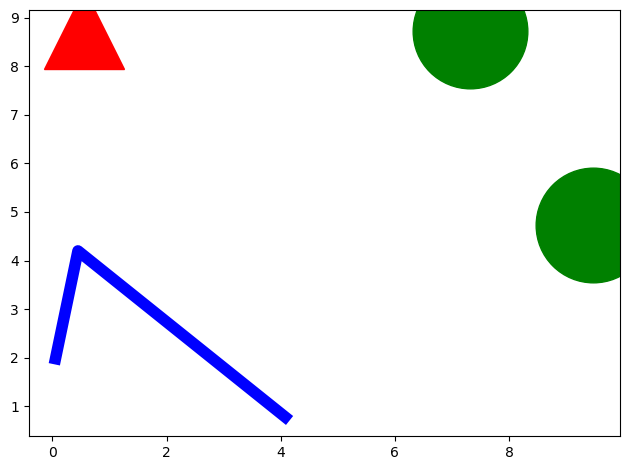

In [12]:
draw_face(my_gene)

# Fitness
 - How sucessful the gene of the agent
 - Euclidean Distance measures the error
 - similarity (fitness) is the inverse of distance
 
$$ Fitness(v) = \frac{1}{1 + dist(v, target)} $$
    

In [13]:
def fitness(v):
    error = (target_gene - v)
    return 1 / (1 + np.dot(error, error))

In [14]:
fitness(my_gene)

0.006144659852343294

In [15]:
fitness(target_gene)

1.0

# Population

In [16]:
N = 4
population = {i:create_gene() for i in range(N)}

In [17]:
population

{0: array([8.56418174, 0.46607702, 6.42054171, 2.11817995, 7.70490443,
        5.52298998, 4.75368639, 9.74923156, 1.94224141, 7.5736775 ,
        8.23369059, 3.42339386, 8.9945184 , 6.39307353, 2.28220072]),
 1: array([1.78347779, 0.0116694 , 7.81720276, 6.34018059, 4.07388685,
        0.81869603, 8.24526832, 7.6394619 , 7.86357085, 6.13228912,
        4.97328511, 0.20724997, 0.44932296, 0.82562775, 7.49141568]),
 2: array([3.66733096, 3.65561834, 9.75185174, 8.89555162, 2.84592615,
        1.25705002, 4.04051019, 3.00952177, 2.27388644, 1.72307245,
        4.22455398, 5.60186668, 9.13092244, 9.36118068, 7.65007544]),
 3: array([3.53019593, 1.7037626 , 4.02718473, 3.96729747, 3.49734696,
        6.05954258, 4.43785532, 0.45225382, 9.23996565, 4.53777925,
        3.97830357, 0.10033211, 4.44598843, 0.32273757, 0.8934426 ])}

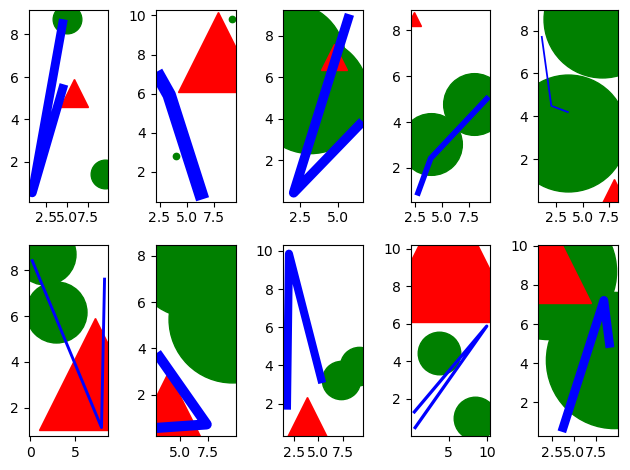

In [18]:
N = 10
population = {i:create_gene() for i in range(N)}

fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    draw_face(population[i])

# Selection
 - who are the successful agents

In [19]:
success = {agent_id: fitness(agent_genome) for agent_id, agent_genome in population.items()}

In [20]:
success

{0: 0.005355157348669865,
 1: 0.0048188197828280335,
 2: 0.006658827411322513,
 3: 0.006321374389411319,
 4: 0.004619967885060283,
 5: 0.004428509330596608,
 6: 0.008061260066282851,
 7: 0.005680003614006514,
 8: 0.004230378605081817,
 9: 0.0038793070419307317}

In [21]:
total_success = sum(success.values())
total_success

0.054053605475190544

In [22]:
reproduction_probability = {agent_id: success[agent_id]/total_success for agent_id in success.keys()}

In [23]:
reproduction_probability

{0: 0.0990712331137239,
 1: 0.08914890580314332,
 2: 0.12318932942186019,
 3: 0.11694639670822136,
 4: 0.08547011516522704,
 5: 0.08192810251351687,
 6: 0.14913454885045177,
 7: 0.10508093889525122,
 8: 0.07826265367300006,
 9: 0.07176777585560414}

In [24]:
pr = [reproduction_probability[agent_id] for agent_id in range(N)]
select = np.random.choice(N, 2, replace= False, p=pr)
select

array([6, 9])

In [25]:
def selection(population):
    success = {agent_id: fitness(agent_genome) for agent_id, agent_genome in population.items()}
    total_success = sum(success.values())
    reproduction_probability = {agent_id: success[agent_id]/total_success for agent_id in success.keys()}
    pr = [reproduction_probability[agent_id] for agent_id in range(N)]
    select = np.random.choice(N, 2, replace= False, p=pr)
    return select

In [26]:
selection(population)

array([7, 4])

# Crossover

In [27]:
parent0 = population[select[0]]
parent1 = population[select[1]]

In [28]:
parent0

array([6.16300171, 9.64414597, 8.09737632, 5.28585063, 9.13438253,
       3.88327177, 0.60948841, 7.97911036, 3.13769   , 7.37210795,
       3.28215862, 3.62163441, 0.71917489, 0.58159516, 7.31570144])

In [29]:
parent1

array([2.05260657, 9.54886003, 8.69611997, 4.17736945, 9.80653283,
       1.38080312, 9.59625402, 7.01925345, 9.01657772, 8.38853129,
       3.7955909 , 5.00936784, 7.20520613, 0.70189192, 6.357553  ])

In [30]:
cut = np.random.randint(m)

child = np.hstack((parent0[:cut],parent1[cut:]))

In [31]:
child

array([6.16300171, 9.64414597, 8.09737632, 5.28585063, 9.13438253,
       3.88327177, 9.59625402, 7.01925345, 9.01657772, 8.38853129,
       3.7955909 , 5.00936784, 7.20520613, 0.70189192, 6.357553  ])

In [32]:
def crossover(selectedParents):
    parent0 = population[selectedParents[0]]
    parent1 = population[selectedParents[1]]
    
    cut = np.random.randint(m)
    child0 = np.hstack((parent0[:cut],parent1[cut:]))
    child1 = np.hstack((parent1[:cut],parent0[cut:]))
    return child0, child1

In [33]:
crossover(select)

(array([6.16300171, 9.64414597, 8.09737632, 5.28585063, 9.13438253,
        3.88327177, 0.60948841, 7.97911036, 3.13769   , 8.38853129,
        3.7955909 , 5.00936784, 7.20520613, 0.70189192, 6.357553  ]),
 array([2.05260657, 9.54886003, 8.69611997, 4.17736945, 9.80653283,
        1.38080312, 9.59625402, 7.01925345, 9.01657772, 7.37210795,
        3.28215862, 3.62163441, 0.71917489, 0.58159516, 7.31570144]))

# Mutation

In [34]:
def mutation(child, p = 0.05):
    mutation_point = np.random.randint(len(child))
    if np.random.rand() < p:
        child[mutation_point] = np.random.rand() * 10
    return child
    

In [35]:
mutation(child, p = 0.995)

array([6.16300171, 9.64414597, 8.09737632, 5.28585063, 9.13438253,
       3.88327177, 9.59625402, 7.01925345, 9.01657772, 8.38853129,
       3.7955909 , 5.00936784, 5.79684613, 0.70189192, 6.357553  ])

# Agent-Oriented Programming

In [42]:
eyes = [2.25,3.75,5,5,4] 
nose = [3,3,6]
mouth = [2.5,3,3.5, 1.15,1,1.15,8]

target_gene = np.array(eyes + nose + mouth)

def draw_face(target = target_gene, small = False):
    eye_size, nose_size = 10, 10
    if small: eye_size, nose_size = 8, 3
    
    plt.plot([target[0],target[1]], [target[2],target[3]], 'go', markersize=target[4]*eye_size)
    plt.plot(target[5], target[6], 'r^', markersize=target[7]*nose_size)
    plt.plot([target[8],target[9],target[10]], [target[11],target[12],target[13]], 'b', linewidth=target[14])
    plt.tight_layout()

class agent():
    def __init__(self, idx, m = 15):
        self.id = idx
        self.m = m
        self.genome = create_gene()
        
    def create_gene(self):
        return np.random.rand(self.m) * 10
    
    def set_gene(self, new_gene):
        self.genome = new_gene
    
    def fitness(self):
        error = (target_gene - self.genome)
        return 1 / (1 + np.dot(error, error))
    
    
class evolution():
    def __init__(self, N): 
        self.N = N
        self.population = {i:agent(i) for i in range(N)}
        self.update_probabilities()

    def update_probabilities(self):
        self.success = {i: self.population[i].fitness() for i in range(N)}
        total_success = sum(self.success.values())
        
        self.reproduction_probability = {i: self.success[i]/total_success for i in range(N)}

    def selection(self):
        pr = [self.reproduction_probability[i] for i in range(N)]
        select = np.random.choice(N, 2, replace= False, p=pr)
        return select
    
    def crossover(self, selectedParents):
        parent0 = self.population[selectedParents[0]].genome
        parent1 = self.population[selectedParents[1]].genome

        cut = np.random.randint(m)
        child_gene = np.hstack((parent0[:cut],parent1[cut:]))
        return child_gene
    
    def mutation(self, child_gene, p = 1):
        mutation_point = np.random.randint(len(child_gene))
        if np.random.rand() < p:
            child_gene[mutation_point] = np.random.rand() * 10
        return child_gene
    
    def create_offspring(self):
        parents = self.selection()
        child_gene = self.crossover(parents)
        
        child_gene = mutation(child_gene)
        return child_gene
    
    def create_new_population(self):
        sorted_by_success = sorted(self.success.items(), key=lambda kv: kv[1])
        self.best_agent = self.population[sorted_by_success[-1][0]]
        
        for i in range(self.N//2):
            child_gene = self.create_offspring()
            agent_id = sorted_by_success[i][0]
            self.population[agent_id].set_gene(child_gene)
        
        self.update_probabilities()
    
    def evolve(self, G = 10):
        for i in range(G):
            self.create_new_population()
        return self.best_agent
    

In [43]:
world = evolution(10)

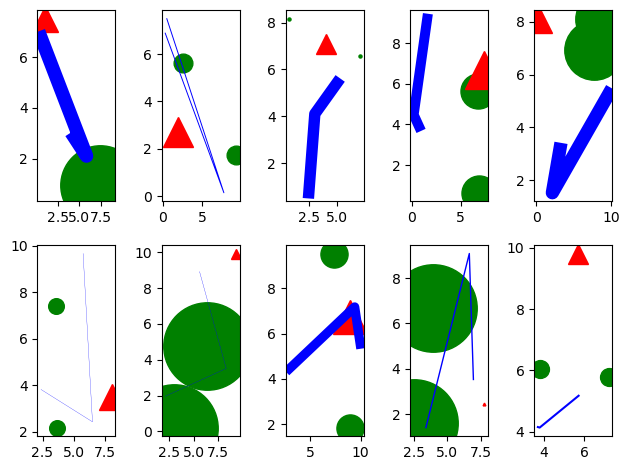

In [44]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    draw_face(world.population[i].genome, small=True)

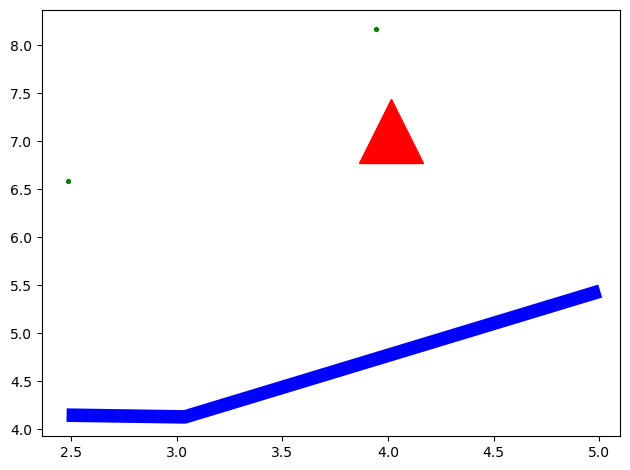

In [45]:
best = world.evolve(G = 10)
draw_face(best.genome)

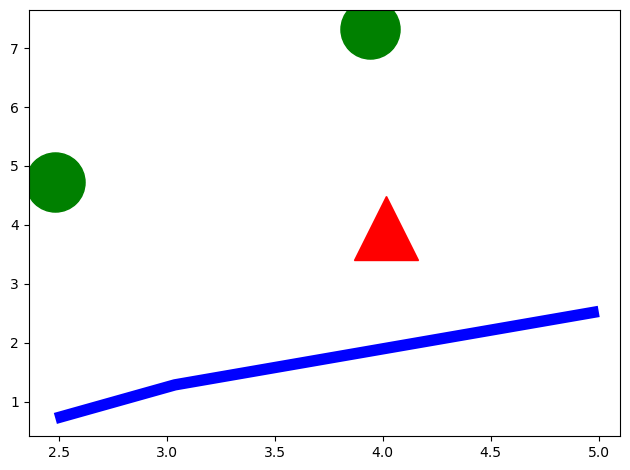

In [46]:
best = world.evolve(G = 90)
draw_face(best.genome)

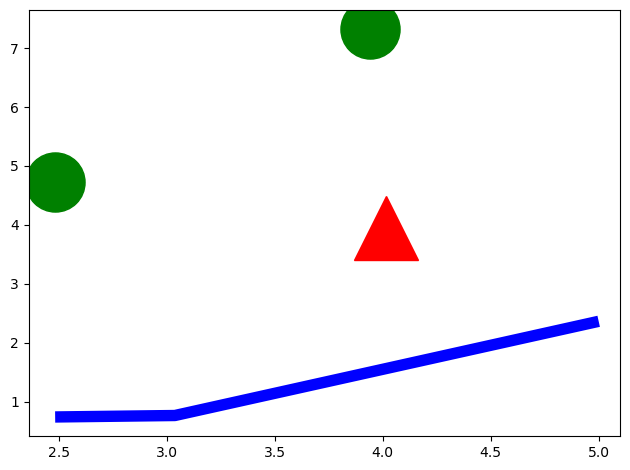

In [47]:
best = world.evolve(G = 90)
draw_face(best.genome)

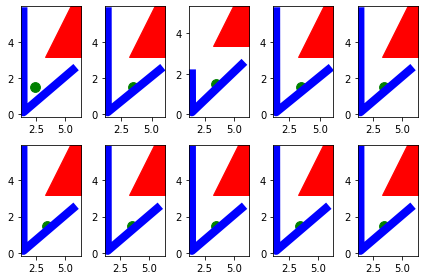

In [39]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    draw_face(world.population[i].genome)

In [40]:
world.population[0].genome

array([2.40541517, 5.86927707, 1.49692531, 5.07663741, 0.97792859,
       6.09119093, 5.00515648, 6.67512101, 1.39886949, 1.40711924,
       5.6635443 , 5.67418417, 0.11236863, 2.45066577, 8.29107264])

In [41]:
world.population[1].genome

array([3.46136191, 5.86927707, 1.49692531, 5.07663741, 0.97792859,
       5.86676248, 5.00515648, 6.67512101, 1.39886949, 1.40711924,
       5.6635443 , 5.67418417, 0.11236863, 2.45066577, 8.29107264])

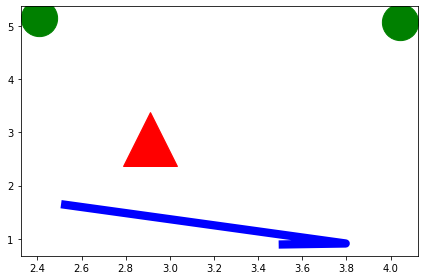

In [42]:
best = world.evolve(G = 1000)
draw_face(best.genome)

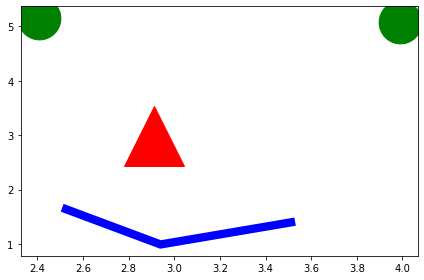

In [43]:
best = world.evolve(G = 1000)
draw_face(best.genome)

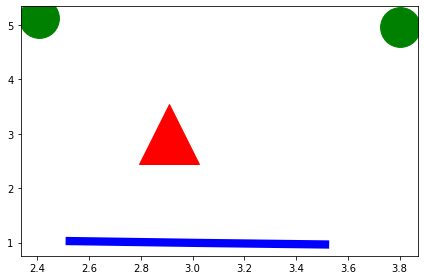

In [44]:
best = world.evolve(G = 1000)
draw_face(best.genome)

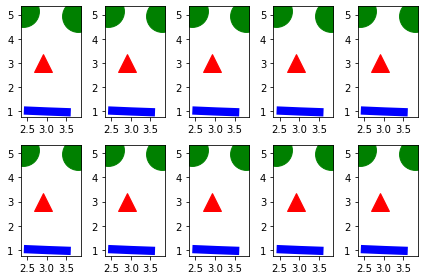

In [45]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    draw_face(world.population[i].genome, small=True)

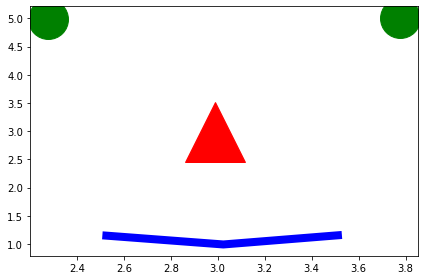

In [46]:
best = world.evolve(G = 10000)
draw_face(best.genome)

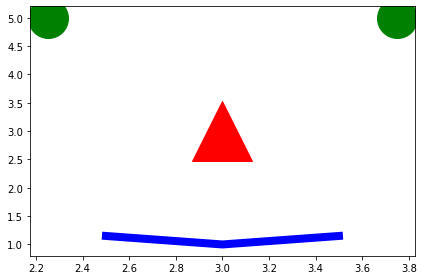

In [47]:
draw_face(target_gene)